In [1]:
import numpy as np

In [2]:
import pylab as plt
import pandas as pd
import networkx as nx

In [3]:
edge_list = [(0,2), (0,1), (0,3), (2,4), (5,6), (7,4), (0,6), (5,3), (3,7), (0,8)]

In [4]:
goal = 7

In [5]:
G = nx.Graph()
G.add_edges_from(edge_list)

In [6]:
pos = nx.spring_layout(G)

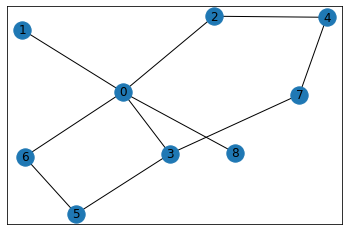

In [7]:
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
plt.show()

In [8]:
MATRIX_SIZE = 9

In [9]:
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1

In [10]:
for edge in edge_list:
    if edge[1] == goal:
        R[edge] = 100
    else:
        R[edge] = 0
    if edge[0] == goal:
        R[edge[::-1]] = 100
    else:
        R[edge[::-1]] = 0
R[goal, goal] = 100

In [11]:
pd.DataFrame(R)

,0,1,2,3,4,5,6,7,8
0,-1.0,0.0,0.0,0.0,-1.0,-1.0,0.0,-1.0,0.0
1,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,0.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0
3,0.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,100.0,-1.0
4,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,100.0,-1.0
5,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0
6,0.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0
7,-1.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,100.0,-1.0
8,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [12]:
gamma = 0.8

In [13]:
Q = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))  # q table

In [14]:
pd.DataFrame(Q)

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# helper functions
def get_available_actions(state):
    curr_state_row = R[state,]
    available_actions = np.where(curr_state_row >= 0)[1]
    return available_actions

def sample_next_action(available_actions):
    next_action = np.random.choice(available_actions, size=1)
    return int(next_action)

def update_q_function(current_state, action, gamma):
    next_index = np.random.choice(Q.shape[0], 1)
    print(next_index)
    value = Q[action, next_index]
    Q[current_state, action] = R[current_state, action] + gamma * value
    print(Q[current_state, action])

In [16]:
initial_state = 0

In [17]:
available_actions = get_available_actions(initial_state)

In [18]:
print(available_actions)

[1 2 3 6 8]


In [19]:
action = sample_next_action(available_actions)

In [20]:
print(action)

3


In [29]:
update_q_function(initial_state, action, gamma)

[3]
-1.0


In [22]:
# running iteration to populate Q table for optimal policy value
for i in range(700):
    curr_state = np.random.randint(0, int(Q.shape[0]))
    available_actions = get_available_actions(curr_state)
    action = sample_next_action(available_actions)
    update_q_function(curr_state, action, gamma)

0.0
0.0
0.0
0.0
100.0
0.0
0.0
0.0
0.0
0.0
0.0
100.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
100.0
80.0
0.0
0.0
0.0
0.0
100.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
100.0
0.0
100.0
0.0
0.0
0.0
100.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
100.0
0.0
0.0
0.0
0.0
0.0
0.0
100.0
0.0
0.0
0.0
0.0
100.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
100.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
100.0
100.0
100.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
100.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
100.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
180.0
0.0
0.0
0.0
0.0
0.0
0.0
100.0
0.0
0.0
0.0
0.0
0.0
0.0
100.0
0.0
0.0
0.0
100.0
0.0
0.0
0.0
0.0
100.0
0.0
0.0
0.0
0.0
0.0
100.0
0.0
0.0
0.0
0.0
0.0
0.0
100.0
0.0
0.0
100.0
0.0
0.0
0.0
80.0
0.0
0.0
100.0
0.0
0.0
0.0
0.0
100.0
0.0
80.0
0.0
100.0
100.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
100.0
0.0
100.0
0.0
0.0
0.0
0.0
0.0
0.0
0

In [30]:
# trained q table
pd.DataFrame(Q)

,0,1,2,3,4,5,6,7,8
0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,80.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,80.0,0.0,0.0,0.0,100.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
# normalize q table
pd.DataFrame(Q*100/np.max(Q))

,0,1,2,3,4,5,6,7,8
0,-0.555556,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
1,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
2,0.000000,0.0,0.0,0.000000,44.444444,0.0,0.0,0.000000,0.0
3,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,100.000000,0.0
4,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,55.555556,0.0
5,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
6,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
7,0.000000,0.0,0.0,44.444444,0.000000,0.0,0.0,55.555556,0.0
8,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0


In [32]:
curr_step = 0

steps = [curr_step]
while curr_step != goal:
    next_step_index = np.where(Q[curr_step, ] == np.max(Q[curr_step, ]))[1]
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size=1))
    else:
        next_step_index = int(next_step_index)
    steps.append(next_step_index)
    curr_step = next_step_index

In [33]:
print(steps)

[0, 4, 7]


It shows the best way to get to the goal is via 0, 3, 7 nodes.